In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import glob
import os

In [3]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 16

# Classical Set Redundancy Compression

## CIFAR 10

In [4]:
cifar10 = np.array([186214115])

In [5]:
cifar_png = np.load("./Saved_datas/CIFAR10_png_size.npy")
print(cifar_png)
cifar_png = cifar10 / cifar_png
cifar_png

148365449


array([1.25510431])

## Min-Max Differential

In [17]:
np.load("./Saved_datas/mmdf_KMeans10_png_size.npy")

array(334790159)

In [18]:
mmdf_kmeans_png = []
for k in [10, 20, 30, 40, 50, 60, 70, 80, 90]:
    name = "./Saved_datas/mmd_flatten_KMeans" + str(k) + "_png_size.npy"
    mmdf_kmeans_png.append(np.load(name))
mmdf_kmeans_png = np.array(mmdf_kmeans_png).squeeze()
print(mmdf_kmeans_png)

mmdf_kmeans_png = cifar10 / mmdf_kmeans_png
mmdf_kmeans_png


[155568804 150141918 151160421 151919381 152633064 153323341 154012987
 154616893 155083185]


array([1.19698879, 1.240254  , 1.2318973 , 1.22574298, 1.22001164,
       1.21451903, 1.2090806 , 1.20435815, 1.20073698])

Min-Max Differential and Delta

In [19]:
mmdf_delta_kmeans_png = []
for k in [10, 20, 30, 40, 50, 60, 70, 80, 90]:
    name = "./Saved_datas/mmd_delta_KMeans" + str(k) + "_png_size.npy"
    mmdf_delta_kmeans_png.append(np.load(name))
mmdf_delta_kmeans_png = np.array(mmdf_delta_kmeans_png).squeeze()

mmdf_delta_kmeans_png = cifar10 / mmdf_delta_kmeans_png
mmdf_delta_kmeans_png

array([1.7365392 , 1.85417209, 1.82793576, 1.8088479 , 1.79404693,
       1.78002134, 1.76422768, 1.75342584, 1.74523244])

Delta and Min-Max differential

In [20]:
delta_mmdf_kmeans_png = []
for k in [10, 20, 30, 40, 50, 60, 70, 80, 90]:
    name = "./Saved_datas/delta_mmd_KMeans" + str(k) + "_png_size.npy"
    delta_mmdf_kmeans_png.append(np.load(name))
delta_mmdf_kmeans_png = np.array(delta_mmdf_kmeans_png).squeeze()

delta_mmdf_kmeans_png = cifar10 / delta_mmdf_kmeans_png
delta_mmdf_kmeans_png


array([1.11993808, 1.14429901, 1.13664191, 1.13343536, 1.129019  ,
       1.12738774, 1.12456343, 1.12234285, 1.1211489 ])

Only Delta

In [21]:
delta_png = np.load("./Saved_datas/delta_png_size.npy")
delta_png = np.array(delta_png).squeeze()
delta_png = cifar10 / delta_png
delta_png 

array([1.95696275])

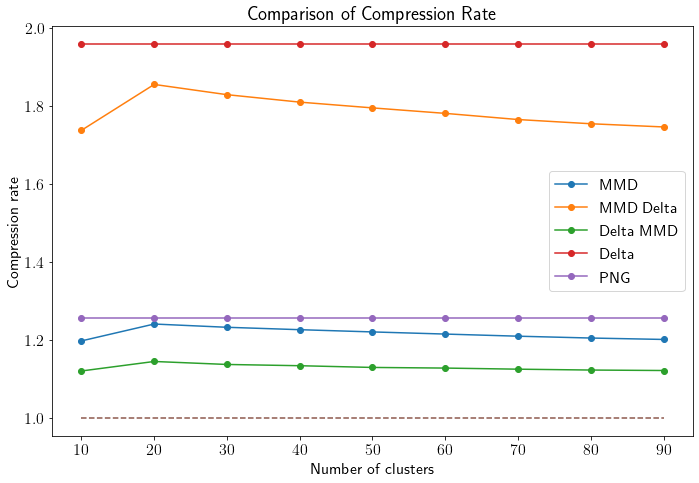

In [22]:
n_clusters = np.arange(10, 91, 10)
x = np.ones(len(n_clusters))
plt.figure(figsize=(10,7))
plt.plot(n_clusters, mmdf_kmeans_png, "-o", label = "MMD")
plt.plot(n_clusters, mmdf_delta_kmeans_png, "-o", label = "MMD Delta")
plt.plot(n_clusters, delta_mmdf_kmeans_png, "-o", label = "Delta MMD")
plt.plot(n_clusters, delta_png * x, "-o", label = "Delta")
plt.plot(n_clusters, cifar_png * x, "-o", label = "PNG")
plt.plot(n_clusters, x, "--")
plt.title("Comparison of Compression Rate")
plt.xlabel("Number of clusters")
plt.ylabel("Compression rate")
plt.legend()
plt.tight_layout()
plt.savefig("./Image/rate_mmd.pdf")
plt.show()

## Min-Max Predictive

MMP

In [37]:
path = ".\Dataset\Compressed\mmp_png\KMeans10"

In [6]:
mmp_png = []

for k in [10, 20, 30, 40, 50, 60, 70, 80, 90]:
    name = "./Saved_datas/mmp_KMeans" + str(k) + "_png_size.npy"
    mmp_png.append(np.load(name))
mmp_png = np.array(mmp_png).squeeze()

mmp_png = cifar10 / mmp_png
mmp_png
mmp_png = np.array(mmp_png)

In [7]:
mmp_png

array([0.55621144, 0.56047334, 0.55968513, 0.5589515 , 0.55847155,
       0.55782484, 0.55738248, 0.55696166, 0.55658073])

MMP - Delta

In [8]:
mmp_delta_png = []

for k in [10, 20, 30, 40, 50, 60, 70, 80, 90]:
    name = "./Saved_datas/mmp_delta_KMeans" + str(k) + "_png_size.npy"
    mmp_delta_png.append(np.load(name))
mmp_delta_png = np.array(mmp_delta_png).squeeze()

mmp_delta_png = cifar10 / mmp_delta_png
mmp_delta_png
mmp_delta_png = np.array(mmp_delta_png)

In [9]:
mmp_delta_png

array([1.50106963, 1.50956427, 1.50841297, 1.50718724, 1.50612849,
       1.5047975 , 1.50391986, 1.50280494, 1.50202529])

Delta - MMP

In [10]:
delta_mmp_png = []

for k in [10, 20, 30, 40, 50, 60, 70, 80, 90]:
    name = "./Saved_datas/delta_mmp_KMeans" + str(k) + "_png_size.npy"
    delta_mmp_png.append(np.load(name))
delta_mmp_png = np.array(delta_mmp_png).squeeze()

delta_mmp_png = cifar10 / delta_mmp_png
delta_mmp_png
delta_mmp_png = np.array(delta_mmp_png)

In [11]:
delta_mmp_png

array([1.17540524, 1.1969396 , 1.19113542, 1.18875026, 1.18464214,
       1.18277044, 1.1802096 , 1.1780595 , 1.17675334])

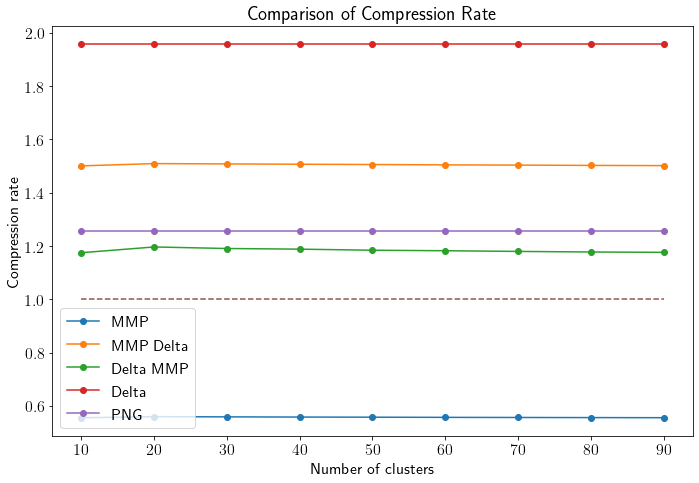

In [16]:
n_clusters = np.arange(10, 91, 10)
x = np.ones(len(n_clusters))
plt.figure(figsize=(10,7))
plt.plot(n_clusters, mmp_png, "-o", label = "MMP")
plt.plot(n_clusters, mmp_delta_png, "-o", label = "MMP Delta")
plt.plot(n_clusters, delta_mmp_png, "-o", label = "Delta MMP")
plt.plot(n_clusters, delta_png * x, "-o", label = "Delta")
plt.plot(n_clusters, cifar_png * x, "-o", label = "PNG")
plt.plot(n_clusters, x, "--")
plt.title("Comparison of Compression Rate")
plt.xlabel("Number of clusters")
plt.ylabel("Compression rate")
plt.legend(loc = 3)
plt.tight_layout()
plt.savefig("./Image/rate_mmp.pdf")
plt.show()

# Number of images

In [24]:
n_clusters

array([10, 20, 30, 40, 50, 60, 70, 80, 90])

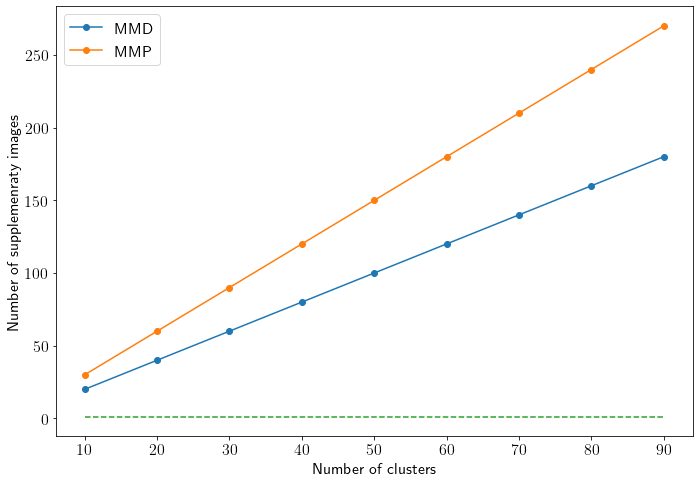

In [28]:
plt.figure(figsize=(10,7))
plt.plot(n_clusters, 2*n_clusters, "-o", label = "MMD")
plt.plot(n_clusters, 3*n_clusters, "-o", label = "MMP")
# plt.plot(n_clusters, 0*n_clusters, "-o", label = "Delta")
# plt.plot(n_clusters, delta_png * x, "-o", label = "Delta")
# plt.plot(n_clusters, cifar_png * x, "-o", label = "PNG")
plt.plot(n_clusters, x, "--")
# plt.title("Supplementary information produced bby SRC")
plt.xlabel("Number of clusters")
plt.ylabel("Number of supplemenraty images")
plt.legend()
plt.tight_layout()
plt.savefig("./Image/supp_images.pdf")
plt.show()

In [23]:
np.load("./Saved_datas/MNIST10median_png_size.npy")

array(24152459)